Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

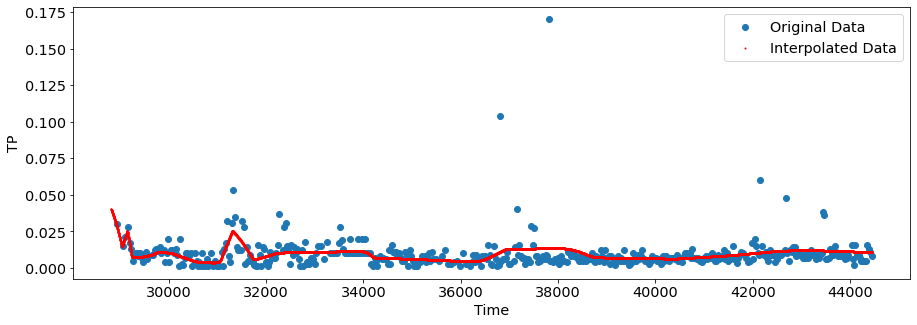

313/313 [==============================] - 0s 353us/step - loss: 8.7527e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelSP01_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/SP01.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28934.42                            
time_max = 44455.39                                

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421016237
,0.424817546
,0.428747713
,0.43267788
,0.436608047
,0.440538215
,0.444532811
,0.44833412
,0.452264287
,0.456194454
,0.460124621
,0.464054788
,0.522878436
,0.593492585
,0.830720045
,0.970015474
])
interpolation

array([[0.02694204],
       [0.02651359],
       [0.02606165],
       [0.02557926],
       [0.02469371],
       [0.02414262],
       [0.02369324],
       [0.02326561],
       [0.02282347],
       [0.02238134],
       [0.0219392 ],
       [0.02149707],
       [0.06991895],
       [0.07239091],
       [0.0504984 ],
       [0.06099498]], dtype=float32)